<a href="https://colab.research.google.com/github/elizabeth-ngandu/Ads-Perfomance-using-R/blob/master/THE_REVOLUTIONARY_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#THE REVOLUTIONARY PROJECT

#1.DEFINING THE ANALYTIC QUESTION

## a) SPECIFYING THE DATA ANALYTIC QUESTION

Is there a significant difference in the volume of sales between Europe and North America countries

##b) DEFINING THE METRICS OF SUCCESS

Conducting an experiment to determine the claim that there is a significant difference in the volume of sales between to Europe and North America countries

##c) UNDERSTANDING THE CONTEXT
Domain: Bussiness Analytics. A profit seeking entity achieves optimal success levels, majorly determined, by having good sales practices. With data we would be able to understand the process of sales simulation by apply the knowledge learnt from module 1. Areas of interest include.... 1) Cutomer segmentation : grouping  territories by volume of sales. 2) Analyse their product perfomance in terms of sales in the various segments. 


##d) RECORDING THE EXPERIMETAL DESIGN 

1.   We will first conduct univariate analysis which will give us insight into each collected variable
2.   We will then conduct bivariate analysis which will enable us to check relationships between our collected variables


##e) DATA RELEVANCE

#2.READING DATA

### IMPORTING OUR LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING THE DATASET

In [ ]:
#reading the dataset using pandas
sales=pd.read_csv('sales_data_sample.csv', encoding= 'latin')


#3.CHEKING THE DATA

In [ ]:
# Cheking the no. records of data in our dataset
sales.shape

# Our data has 2823 rows and 25 columns

(2823, 25)

In [ ]:
#preview the first 5 rows of our dataset
sales.head()

# MSRP meaning -  manufacturer's suggested retail price

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
#preview the bottom 5 rows of our data
sales.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [ ]:
# Checking for information about our dataset
sales.info()

#The output displays the column names in my dataset
#Number of rows in each column
#Data type of each field

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


# 4.EXTERNAL DATASOURCE VALIDATION

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number.

Validating such information with an external reliable resource such as World Bank sales Data would be important step to providing credibility to our dataset.

# 5.TIDYING THE DATASET

In [ ]:
#Drop columns that will not be usefull in our analysis

sales.drop(['QTR_ID','PHONE','ADDRESSLINE2','STATE','CONTACTLASTNAME','CONTACTFIRSTNAME','POSTALCODE','PRODUCTCODE','CUSTOMERNAME','ADDRESSLINE1'], axis=1,inplace=True)


In [ ]:
# Removing white spaces and ensuring uniformity in our dataset

sales.columns = sales.columns.str.strip().str.replace(' ',' ').str.upper()
sales['ORDERDATE'] = sales['ORDERDATE'].str.strip().str.replace('/','-')
sales['STATUS']= sales['STATUS'].str.strip().str.replace(' ',' ')
sales['PRODUCTLINE'] = sales['PRODUCTLINE'].str.strip().str.replace(' ',' ')
sales['CITY'] = sales['CITY'].str.strip().str.replace(' ',' ')
sales['COUNTRY'] = sales['COUNTRY'].str.strip().str.replace(' ',' ')
sales['TERRITORY'] =  sales['TERRITORY'].str.strip().str.replace(' ',' ')
sales['DEALSIZE'] = sales['DEALSIZE'].str.strip().str.replace(' ',' ')

In [ ]:
# We deal with null values
# We first check if null values exist in our data

sales.isnull().sum()

ORDERNUMBER           0
QUANTITYORDERED       0
PRICEEACH             0
ORDERLINENUMBER       0
SALES                 0
ORDERDATE             0
STATUS                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
MSRP                  0
CITY                  0
COUNTRY               0
TERRITORY          1074
DEALSIZE              0
dtype: int64

In [ ]:
# Our null values in the column Teritoty represent North America Territory which was written as NA
# The panda library read NA initials as null values
# We will replace NA initials with N.AME

sales['TERRITORY'].fillna('N.AME', inplace=True)


In [ ]:
#We drop duplicates if they exist

sales.duplicated().sum()

#We have no duplicated data hence we will not need to drop any duplicated values

0

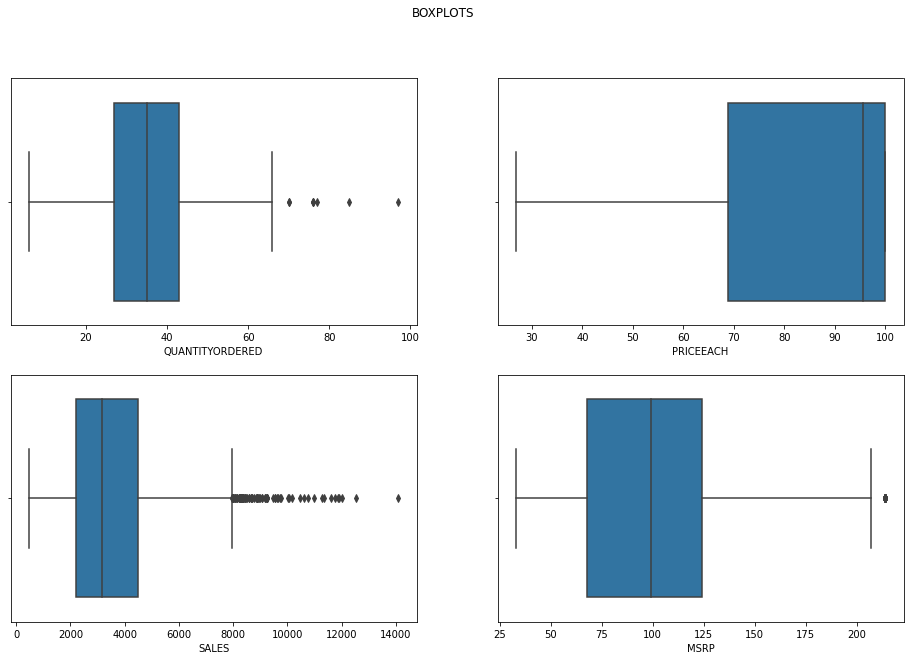

In [ ]:
#Checking for outliers

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(16,10))

fig.suptitle('BOXPLOTS')

sns.boxplot(sales['QUANTITYORDERED'], ax= ax1, orient = 'h')
sns.boxplot(sales['PRICEEACH'],ax = ax2, orient = 'h')
sns.boxplot(sales['SALES'], ax = ax3, orient = 'h')
sns.boxplot(sales['MSRP'], ax = ax4, orient = 'h')

plt.show()

#There are some outliers on the quantity ordered and sale
#probably because some customers have ordered products above the average quantity or sale

In [ ]:
#Change out datetime date data from object to Datetime

sales['ORDERDATE']=pd.to_datetime(sales['ORDERDATE'], infer_datetime_format=True)

In [ ]:
#check anomalies in our numerical data
sales.describe() 

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,12.000000,2005.00000,214.000000


In [ ]:
#Counter check our dataset to make sure it is clean
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   float64       
 3   ORDERLINENUMBER  2823 non-null   int64         
 4   SALES            2823 non-null   float64       
 5   ORDERDATE        2823 non-null   datetime64[ns]
 6   STATUS           2823 non-null   object        
 7   MONTH_ID         2823 non-null   int64         
 8   YEAR_ID          2823 non-null   int64         
 9   PRODUCTLINE      2823 non-null   object        
 10  MSRP             2823 non-null   int64         
 11  CITY             2823 non-null   object        
 12  COUNTRY          2823 non-null   object        
 13  TERRITORY        2823 non-null   object        
 14  DEALSIZE         2823 non-null   object 

In [ ]:
#export our clean dataset data future use

sales.to_csv('sales.csv')

# 6.EXPLANATORY ANAYSIS

##UNIVARIATE ANALYSIS

In [ ]:
# Measure of Central Tendancy for categorical data

sales_mode =sales[['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER','SALES', 'ORDERDATE', 'STATUS', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE','MSRP', 'CITY','COUNTRY', 'TERRITORY', 'DEALSIZE']].mode()
sales_mode.T



,0
QUANTITYORDERED,34
PRICEEACH,100
ORDERLINENUMBER,1
SALES,3003
ORDERDATE,2003-11-14 00:00:00
STATUS,Shipped
MONTH_ID,11
YEAR_ID,2004
PRODUCTLINE,Classic Cars
MSRP,118


In [ ]:
# Measure of Central Tendancy for numerical
sales.describe()
# 25% is the first quatile
# 50% is the median
# 75% is the third quatile
# std is the standard deviation

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,12.000000,2005.00000,214.000000


In [ ]:
# INTERQUATILE RANGE QUANTITYORDERED

q1_QUANTITYORDERED,q3_QUANTITYORDERED = np.percentile(sales['QUANTITYORDERED'],[25,75])
iqr_QUANTITYORDERED = q3_QUANTITYORDERED - q1_QUANTITYORDERED
print('THE QUANTITYORDERED INTERQUATILE RANGE IS',iqr_QUANTITYORDERED)
# confidence interval
l_bound_QUANTITYORDERED = q1_QUANTITYORDERED - (1.5*iqr_QUANTITYORDERED)
u_bound_QUANTITYORDERED = q3_QUANTITYORDERED + (1.5*iqr_QUANTITYORDERED)
print('Confidence interval is =',l_bound_QUANTITYORDERED,'--',u_bound_QUANTITYORDERED )
print('\n')

# INTERQUATILE RANGE PRICEEACH
q1_PRICEEACH,q3_PRICEEACH = np.percentile(sales['PRICEEACH'],[25,75])
iqr_PRICEEACH = q3_PRICEEACH - q1_PRICEEACH
print('THE PRICEEACH INTERQUATILE RANGE IS',iqr_PRICEEACH)
# confidence interval
l_bound_PRICEEACH = q1_PRICEEACH - (1.5*iqr_PRICEEACH)
u_bound_PRICEEACH= q3_PRICEEACH + (1.5*iqr_PRICEEACH)
print('Confidence interval is =',l_bound_PRICEEACH,'--',u_bound_PRICEEACH)
print('\n')

# INTERQUATILE RANGE PRICEEACH
q1_SALES,q3_SALES = np.percentile(sales['SALES'],[25,75])
iqr_SALES = q3_SALES - q1_SALES
print('THE SALES INTERQUATILE RANGE IS',iqr_SALES)
# confidence interval
l_bound_SALES = q1_SALES - (1.5*iqr_SALES)
u_bound_SALES = q3_SALES + (1.5*iqr_SALES)
print('Confidence interval is =',l_bound_SALES,'--',u_bound_SALES)
print('\n')

# INTERQUATILE RANGE MSRP
q1_MSRP,q3_MSRP = np.percentile(sales['MSRP'],[25,75])
iqr_MSRP = q3_MSRP - q1_MSRP
print('THE MSRP INTERQUATILE RANGE IS',iqr_MSRP)
# confidence interval
l_bound_MSRP = q1_MSRP- (1.5*iqr_MSRP)
u_bound_MSRP = q3_MSRP + (1.5*iqr_MSRP)
print('Confidence interval is =',l_bound_MSRP,'--',u_bound_MSRP)
print('\n')

# INTERQUATILE RANGE MSRP
q1_ORDERLINENUMBER,q3_ORDERLINENUMBER = np.percentile(sales['ORDERLINENUMBER'],[25,75])
iqr_ORDERLINENUMBER = q3_ORDERLINENUMBER - q1_ORDERLINENUMBER
print('THE MSRP INTERQUATILE RANGE IS',iqr_ORDERLINENUMBER)
# confidence interval
l_bound_ORDERLINENUMBER = q1_ORDERLINENUMBER- (1.5*iqr_ORDERLINENUMBER)
u_bound_ORDERLINENUMBER = q3_ORDERLINENUMBER + (1.5*iqr_ORDERLINENUMBER)
print('Confidence interval is =',l_bound_ORDERLINENUMBER,'--',u_bound_ORDERLINENUMBER)

THE QUANTITYORDERED INTERQUATILE RANGE IS 16.0
Confidence interval is = 3.0 -- 67.0


THE PRICEEACH INTERQUATILE RANGE IS 31.14
Confidence interval is = 22.15 -- 146.71


THE SALES INTERQUATILE RANGE IS 2304.5699999999997
Confidence interval is = -1253.4249999999993 -- 7964.855


THE MSRP INTERQUATILE RANGE IS 56.0
Confidence interval is = -16.0 -- 208.0


THE MSRP INTERQUATILE RANGE IS 6.0
Confidence interval is = -6.0 -- 18.0


In [ ]:
# range
print("QUANTITYORDERED RANGE IS =",sales['QUANTITYORDERED'].max()-sales['QUANTITYORDERED'].min())
print("PRICEEACH RANGE IS =",sales['PRICEEACH'].max()-sales['PRICEEACH'].min())
print("SALES RANGE IS =",sales['SALES'].max()-sales['SALES'].min())
print("MSRP RANGE IS =",sales['MSRP'].max()-sales['MSRP'].min())


QUANTITYORDERED RANGE IS = 91
PRICEEACH RANGE IS = 73.12
SALES RANGE IS = 13600.67
MSRP RANGE IS = 181


In [ ]:
# # We remove the outliers where we drop elements outside the confidence interval

sales = sales[sales['QUANTITYORDERED']<= 67] 
sales = sales[sales['PRICEEACH']<= 146.71] 
sales = sales[sales['SALES']<= 7964.855] 
sales = sales[sales['MSRP']<= 208.0] 

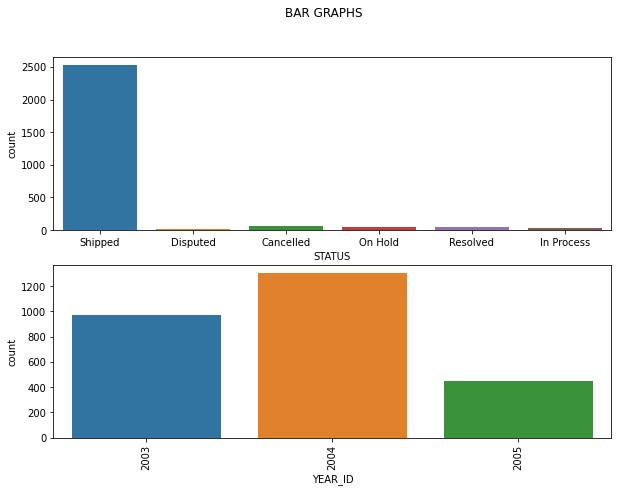

In [ ]:
# WE WILL VISUALIZE FREQUENCY OF OUR DATA USING COUNT PLOTS

# UNIVARIATE VISUALIZATION OF OUR YEAR AND STATUS CATEGORICAL DATA

fig, ((ax1,ax2)) = plt.subplots(2,1,figsize = (10,7))

plt.suptitle('BAR GRAPHS')

plt.xticks(rotation=90)
sns.countplot(sales.STATUS, ax=ax1)
sns.countplot(sales['YEAR_ID'], ax=ax2)
plt.show()

<function matplotlib.pyplot.show>

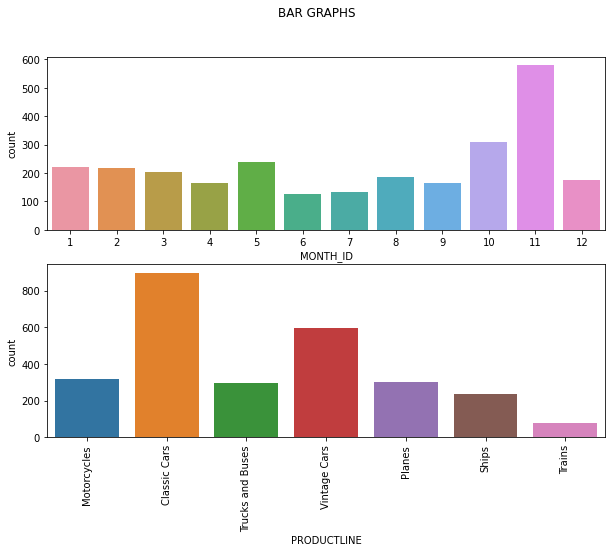

In [ ]:
# WE WILL VISUALIZE FREQUENCY OF OUR DATA USING COUNT PLOTS

#Visualization of our Month and Productline data
fig, ((ax3,ax4)) = plt.subplots(2,1,figsize = (10,7))

plt.suptitle('BAR GRAPHS')
sns.countplot(sales['MONTH_ID'], ax=ax3)
sns.countplot(sales['PRODUCTLINE'], ax=ax4)
plt.xticks(rotation = 90)
plt.show

<function matplotlib.pyplot.show>

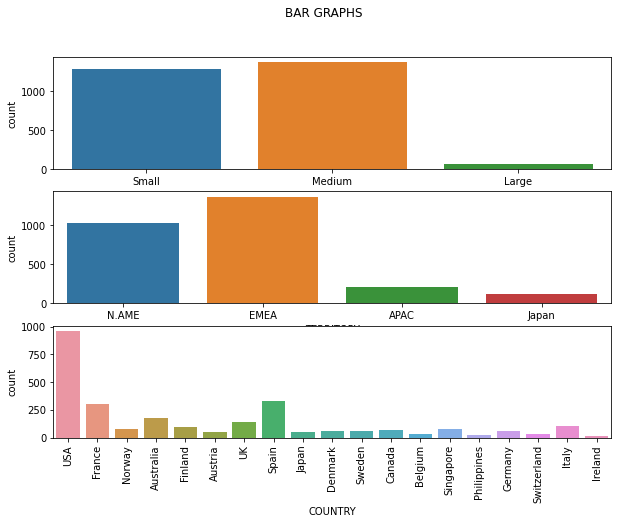

In [ ]:
# WE WILL VISUALIZE FREQUENCY OF OUR DATA USING COUNT PLOTS

#Visualization of our DEALSIZE, TERRITORY and COUNTRY data respectively

fig, ((ax5,ax6,ax7)) = plt.subplots(3,1,figsize = (10,7))

plt.suptitle('BAR GRAPHS')

sns.countplot(sales['TERRITORY'], ax=ax6)

COUNTRY=sns.countplot(sales['COUNTRY'], ax=ax7)
COUNTRY.set_xticklabels(COUNTRY.get_xticklabels(),rotation = 90)

sns.countplot(sales['DEALSIZE'], ax=ax5)

plt.show

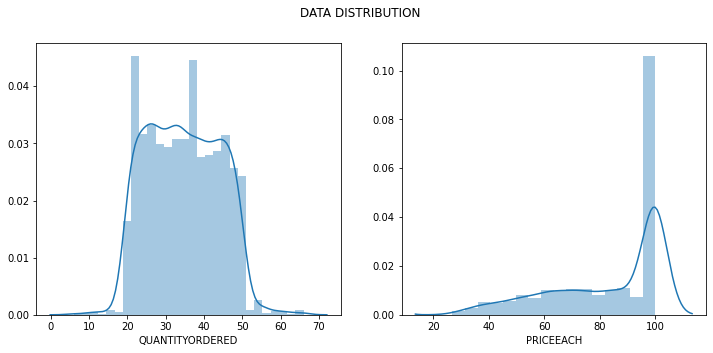

In [ ]:
# Visualizing disribution of our Univariate Data using histograms
# Histogram

fig, ((ax1,ax2)) = plt.subplots(1,2, figsize = (12,5))
plt.suptitle('DATA DISTRIBUTION')
sns.distplot(sales['QUANTITYORDERED'],ax = ax1)
sns.distplot(sales['PRICEEACH'],ax = ax2)
plt.show()

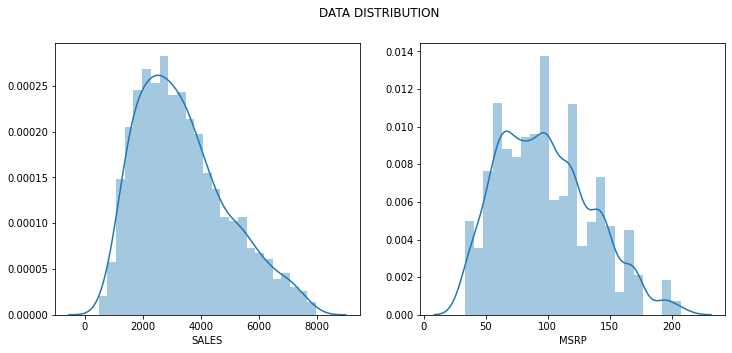

In [ ]:
fig, (ax3, ax4) = plt.subplots(1,2, figsize = (12,5))

plt.suptitle('DATA DISTRIBUTION')

sns.distplot(sales['SALES'],ax = ax3)
sns.distplot(sales['MSRP'],ax = ax4)
plt.show()

In [ ]:
#SKEWNESS
print("SALES SKEWNWSS = ",sales['SALES'].skew())
print("SALES KURTOSIS = ",sales['SALES'].kurt())
print("SALES VARIANCE = ",sales['SALES'].var())
print("SALES STANDARD DEVIATION= ",sales['SALES'].std())
print('\n')
# SALES skewness is moderately skewed
#It has a small kurtosis hence indicating it follows a normal distribution

print("SALES SKEWNWSS = ",sales['QUANTITYORDERED'].skew())
print("SALES KURTOSIS = ",sales['QUANTITYORDERED'].kurt())
print("SALES VARIANCE = ",sales['QUANTITYORDERED'].var())
print("SALES STANDARD DEVIATION= ",sales['QUANTITYORDERED'].std())
print('\n')
# QUANTITYORDERED is symmetric about the mean
# It has a small kurtosis  hence indicating it follows a normal distribution

print("SALES SKEWNWSS = ",sales['PRICEEACH'].skew())
print("SALES KURTOSIS = ",sales['PRICEEACH'].kurt())
print("SALES VARIANCE = ",sales['PRICEEACH'].var())
print("SALES STANDARD DEVIATION= ",sales['PRICEEACH'].std())
print('\n')
# PRICEEACH skewness is moderately skewed
#It has a small kurtosis hence indicating it follows a normal distribution

print("SALES SKEWNWSS = ",sales['MSRP'].skew())
print("SALES KURTOSIS = ",sales['MSRP'].kurt())
print("SALES VARIANCE = ",sales['MSRP'].var())
print("SALES STANDARD DEVIATION= ",sales['MSRP'].std())
# MSRP skewness is moderately skewed
#It has a small kurtosis hence indicating it follows a normal distribution

SALES SKEWNWSS =  0.6628144960054454
SALES KURTOSIS =  -0.17753635561649306
SALES VARIANCE =  2436342.4145476716
SALES STANDARD DEVIATION=  1560.878731531592


SALES SKEWNWSS =  0.1205316114269827
SALES KURTOSIS =  -0.7908192011762818
SALES VARIANCE =  86.95711534209562
SALES STANDARD DEVIATION=  9.325079910761925


SALES SKEWNWSS =  -0.8927332756948834
SALES KURTOSIS =  -0.4724110726082489
SALES VARIANCE =  412.2607840921284
SALES STANDARD DEVIATION=  20.304206068992908


SALES SKEWNWSS =  0.46123477025957965
SALES KURTOSIS =  -0.35261357613073674
SALES VARIANCE =  1402.998028481322
SALES STANDARD DEVIATION=  37.45661528330239


##BIVARIATE ANAYSIS

### Bivariate analysis between sales and other variables

In [ ]:
#Import researchpy Library

!pip install researchpy
import researchpy as rp


In [ ]:
# SALES VS STATUS bivariate data

print('SALES ANALYSIS PER STATUS')
teritory_sum = sales.groupby(['TERRITORY'])['SALES'].sum().sort_values(ascending = False)
print(teritory_sum)
print('\n')

print('SALES ANALYSIS PER COUNTRY')
country_sum = sales.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending = False)
print(country_sum)
print('\n')

print('SALES ANALYSIS PER MONTH_ID')
MONTH_sum = sales.groupby(['MONTH_ID'])['SALES'].sum().sort_values(ascending = False)
print(MONTH_sum)
print('\n')

print('SALES ANALYSIS PER YEAR_ID')
YEAR_sum = sales.groupby(['YEAR_ID'])['SALES'].sum().sort_values(ascending = False)
print(YEAR_sum)
print('\n')

print('SALES ANALYSIS PER PRODUCTLINE')
PRODUCTLINE_sum = sales.groupby(['PRODUCTLINE'])['SALES'].sum().sort_values(ascending = False)
print(PRODUCTLINE_sum)
print('\n')

SALES ANALYSIS PER STATUS
TERRITORY
EMEA     4580000.77
N.AME    3483985.78
APAC      682559.60
Japan     408391.87
Name: SALES, dtype: float64


SALES ANALYSIS PER COUNTRY
COUNTRY
USA            3273112.34
Spain          1132579.42
France          983760.23
Australia       567060.87
UK              458345.22
Italy           332455.88
Finland         318975.71
Norway          276227.92
Singapore       260145.70
Germany         211531.13
Canada          210873.44
Denmark         210127.76
Sweden          195668.91
Austria         184703.98
Japan           169729.17
Switzerland     117713.56
Belgium         108412.62
Philippines      94015.73
Ireland          49498.43
Name: SALES, dtype: float64


SALES ANALYSIS PER MONTH_ID
MONTH_ID
11    1981023.72
10    1043918.22
5      803603.56
2      748040.97
1      725146.80
3      694388.55
8      615830.72
12     593845.46
4      537906.93
9      532411.92
7      459499.93
6      419321.24
Name: SALES, dtype: float64


SALES ANALYSIS PER YEAR_

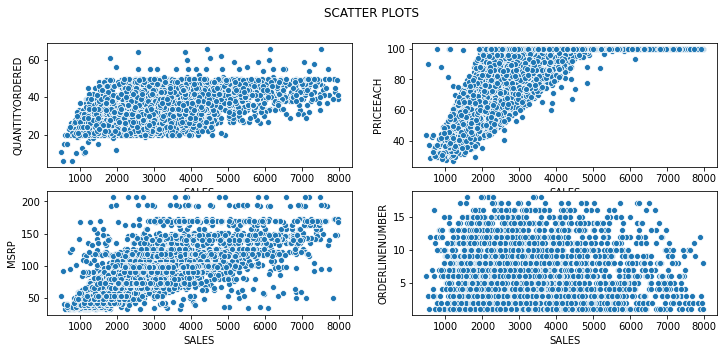

In [ ]:
 # VISUALIVING RELATIONSHIP BETWEEN SALES AND QUANTITY ORDERED TO BANK ACCOUNT

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,5))
plt.suptitle('SCATTER PLOTS')

sns.scatterplot(x= sales['SALES'], y= sales['QUANTITYORDERED'],ax = ax1)
sns.scatterplot(x= sales['SALES'], y= sales['PRICEEACH'],ax = ax2)
sns.scatterplot(x= sales['SALES'], y= sales['MSRP'],ax = ax3)
sns.scatterplot(x= sales['SALES'], y= sales['ORDERLINENUMBER'],ax = ax4)
plt.show()



Text(0, 0.5, 'SUM OF SALES in thousands')

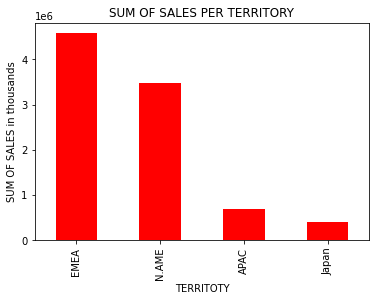

In [ ]:
#Bar plot visualizing sum of sales per Territory

teritory_sum.plot(kind = 'bar',stacked = True, color = "red")
plt.title('SUM OF SALES PER TERRITORY')
plt.xlabel('TERRITOTY')
plt.ylabel('SUM OF SALES in thousands')

Text(0, 0.5, 'SALES')

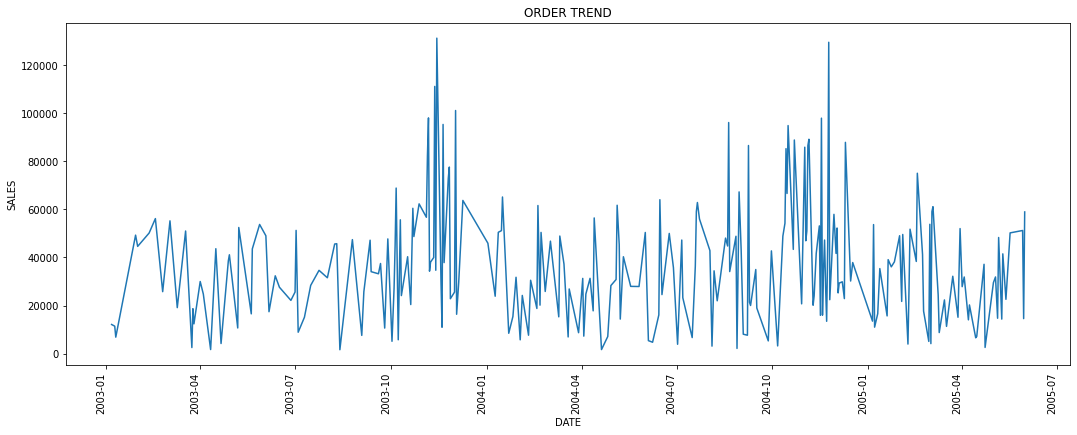

In [ ]:
#Check trend of our data

trend= sales.groupby(['ORDERDATE'])['SALES'].sum().plot(kind = "line", figsize = (18,7))
plt.xticks(rotation = 90)
plt.title('ORDER TREND')
plt.xlabel('DATE')
plt.ylabel('SALES')

In [ ]:
#Convert Categorical Data To Numerical

df = sales.copy()

from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()

df['ORDERLINENUMBER']= Encoder.fit_transform(df['ORDERLINENUMBER'])
df['STATUS']= Encoder.fit_transform(df['STATUS'])
df['PRODUCTLINE']= Encoder.fit_transform(df['PRODUCTLINE'])
df['CITY']= Encoder.fit_transform(df['CITY'])
df['COUNTRY']= Encoder.fit_transform(df['COUNTRY'])
df['TERRITORY']= Encoder.fit_transform(df['TERRITORY'])
df['DEALSIZE']= Encoder.fit_transform(df['DEALSIZE'])
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CITY,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,95.70,1,2871.00,2003-02-24,5,2,2003,1,95,42,18,3,2
1,10121,34,81.35,4,2765.90,2003-05-07,5,5,2003,1,95,56,6,1,2
2,10134,41,94.74,1,3884.34,2003-07-01,5,7,2003,1,95,52,6,1,1
3,10145,45,83.26,5,3746.70,2003-08-25,5,8,2003,1,95,53,18,3,1
4,10159,49,100.00,13,5205.27,2003-10-10,5,10,2003,1,95,59,18,3,1


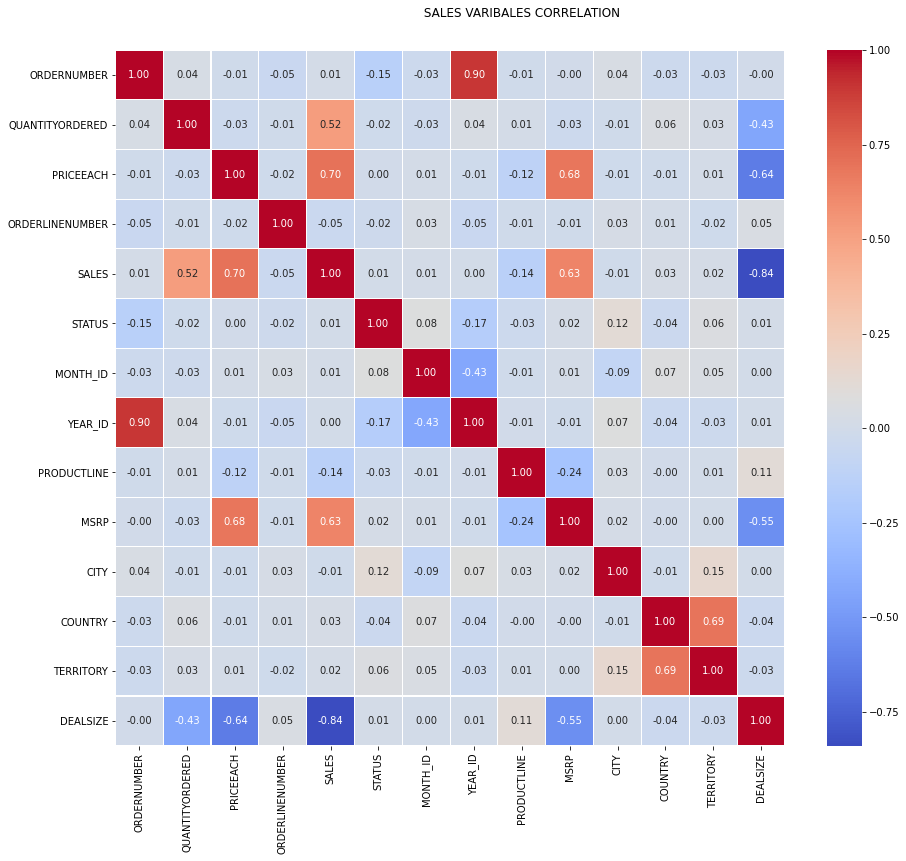

In [ ]:
#CORRELATION PLOT BETWEEN FACTORS
f , ax = plt.subplots(figsize = (15,12))
corr = df.corr()
cor = sns.heatmap(corr, annot = True, ax =ax , cmap = "coolwarm", fmt = '.2f',linewidths= .05)
f.subplots_adjust(top =0.93)
t = f.suptitle(' SALES VARIBALES CORRELATION')

#SALES IS POSITIVELY CORRELATED TO QUANTITYORDERED, PRICE OF EACH ITEM, MSRP
# ie as the variables increase sales also incease depending with the amount of correlation
# IT IS NEGATIVELY CORRELATED TO DEALSIZE the large deal size has lesser sales compared to smaller dealsize


#7.IMPLEMENTING THE SOLUTION

##Check for normality

In [ ]:
#we will use  Shapiro Wilk test to check if our data is normal

from scipy.stats import shapiro

stat,p = shapiro(df['SALES'])
print('statistic = %.3f, p= %.3f' % (stat,p))

alpha= 0.05
if p>0.005:
  print('Sample looks Gaussian')
else:
  print('sample does not look Gaussian')

# our data follows a normal distribution

statistic = 0.958, p= 0.000
sample does not look Gaussian


## random sampling

In [ ]:
#We will first select elements that we are comparing in our hypothesis

teritory = sales[sales['TERRITORY'].isin(['EMEA','N.AME'])]
teritory.head() 


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CITY,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,2,2003,Motorcycles,95,NYC,USA,N.AME,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,5,2003,Motorcycles,95,Reims,France,EMEA,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,7,2003,Motorcycles,95,Paris,France,EMEA,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,8,2003,Motorcycles,95,Pasadena,USA,N.AME,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,10,2003,Motorcycles,95,San Francisco,USA,N.AME,Medium


In [ ]:
#we will use stratification for sampling our data
#we will a sample size of 337 obtained using our sampling formular

# To create a stratified random sample we'll use pandas groupBy method. Basically what the method does is that it splits our dataset into sets and then applies a function on each subset.
# In our case, we are going to applies a function that puts each subset into a random sample with a size of 337. The beauty about this method is that it strictly maintains the populations proportion.

# Stratified sample
strat_output = teritory.groupby('TERRITORY', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(strat_output['TERRITORY'].value_counts())

# Check the stratified output
strat_output.columns


EMEA     136
N.AME    103
Name: TERRITORY, dtype: int64


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'MSRP', 'CITY', 'COUNTRY', 'TERRITORY', 'DEALSIZE'],
      dtype='object')

#8.CHALLENGING THE SOLUTION

## Hypothesis Testing

*Assumptions*

1.   Our data follows a normal distribution
2.   our data has been randomly selected

In [ ]:
# check for normality
# we will use the Anderson_Darling Test
from scipy.stats import anderson
result = anderson(strat_output['SALES'])

print('statistic = %.3f' % result.statistic)
p = 0

for i in range(len(result.critical_values)):
  s1,cv = result.significance_level[i] , result.critical_values[i]
 
  if result.statistic < result.critical_values[i]:
    print('%.3f : %.3f, data looks Normal'% (s1,cv))
  else:
      print('%.3f : %.3f, data doesnt looks Normal'% (s1,cv))

statistic = 4.039
15.000 : 0.567, data doesnt looks Normal
10.000 : 0.645, data doesnt looks Normal
5.000 : 0.774, data doesnt looks Normal
2.500 : 0.903, data doesnt looks Normal
1.000 : 1.074, data doesnt looks Normal


In [ ]:
from scipy.stats import shapiro

stat,p = shapiro(strat_output['SALES'])
print('statistic = %.3f, p= %.3f' % (stat,p))

alpha= 0.05
if p>0.05:
  print('Sample looks Gaussian')
else:
  print('sample does not look Gaussian')

# our data follows a normal distribution

statistic = 0.944, p= 0.000
sample does not look Gaussian


###Hypothesies Statement: 

1.   Ho:There is no difference  between volume of sales of imported cars in EMEA and NA countries 
2.   Ha: There is  a  significant difference between the volume of car sales  imported in EMEA and NA countries

Acceptance criteria

our p_value = 0.05

In [ ]:
# describe our sample
strat_output['SALES'].describe()

count     239.000000
mean     3338.152678
std      1534.541306
min       935.180000
25%      2203.040000
50%      2993.500000
75%      4187.360000
max      7620.500000
Name: SALES, dtype: float64

In [ ]:
# Describe EMEA  elements in a sample

strat_EMEA = strat_output[strat_output['TERRITORY'].isin(['EMEA'])]
strat_EMEA['SALES'].describe()

count     136.000000
mean     3401.922500
std      1541.134342
min       935.180000
25%      2225.880000
50%      2985.380000
75%      4176.470000
max      7516.080000
Name: SALES, dtype: float64

In [ ]:
# Describe N.AME  elements in a sample

strat_NAME = strat_output[strat_output['TERRITORY'].isin(['N.AME'])]
strat_NAME['SALES'].describe()

count     103.000000
mean     3253.951748
std      1529.210076
min      1045.980000
25%      2161.620000
50%      3064.320000
75%      4187.360000
max      7620.500000
Name: SALES, dtype: float64

In [ ]:
# Find our test statistic

X1 = strat_EMEA['SALES'].mean()
X2 = strat_NAME['SALES'].mean()
V1 = strat_NAME['SALES'].var()
V2 = strat_NAME['SALES'].var()
n1 =136
n2 = 103

z_score = ((X1-X2)/((V1/n1)+(V2/n2))**0.5)
z_score

0.7407946673279784

In [ ]:
#finding our p values

from scipy import stats

p = 1 - stats.norm.cdf(z_score)
p*2

# our hypothesis is two tailed hence we multiply our p_value by 2

0.4588179490255868

CONCLUSION -

We will reject the alternative hypothesis in favour of the null hypothesis

since 0.459 < 0.05 our confidence level

hence

There is not enough evidence to support the claim there a significant difference between the volume of sales to Europe and North America countries

p-value equals 0.4588179490255868, ( p(x≤Z) = 0.500243 ). This means that if we would reject H0, the chance of type I error (rejecting a correct H0) would be too high: 0.4588179490255868 (45.88%).

The larger the p-value the more it supports H0.

#9.Follow up questions

a). Did we have the right data?

Yes
 
because using the data we were able to conduct an experiment on our claim

b). Do we need other data to answer our question?

no.

The data provided was sufficient

c). Did we have the right question?
YES

We were able to make conclusion from our data